In [13]:
import matplotlib.pyplot as plt
import paraview.simple as pvs
import pandas as pd
import numpy as np
import math
from pathlib import Path
import SALib


# Biocellion Output Plotting
This notebook defines functions to read and plot the biocellion output data for the Biocellion ABM models by the CMMC that can be found in github.com/TheCMMC. For more information on the CMMC, visit www.thecmmc.org.  

To use these plotting functions the biocellion output summary should be in one directory with the following naming pattern:
`output_parameter{par_id}_trial{trial}.txt`

If the scripts and instructions in https://github.com/TheCMMC/biocellion-tools have been used to create the output, this notebook should be able to run with the resulting data.

## User settings

In [14]:
# Set this data folder to the place where you cloned the repository https://github.com/TheCMMC/biocellion-data
DATA_FOLDER = Path("/home/jaroknor/NLeSC/InSilicoMeat/Biocellion/biocellion-data")
MODEL_FOLDER = Path("/home/jaroknor/NLeSC/InSilicoMeat/Biocellion/Biocellion-3.1/biocellion-3.1/biocellion-user")
FIG_FOLDER = Path("./figures")

In [15]:
ABM_ONLY_DATA_FOLDER = DATA_FOLDER / "PLOSone_ABM-only-microcarrier"
ABM_ONLY_MODEL_FOLDER = MODEL_FOLDER / "ABM-only-microcarriers"

ABM_CFD_DATA_FOLDER = DATA_FOLDER / "PLOSone_ABM-CFD-microcarrier"
ABM_CFD_MODEL_FOLDER = MODEL_FOLDER / "ABM-microcarriers"

In [16]:
color_dict={'live': '#1f77b4', 'attached': '#2ca02c', 'dead': '#ff7f0e', 'removed': '#d62728'}

## Generate parameters

In [128]:
parameter_columns = ["name", "range_min", "range_max", "range_type", "file"]
parameter_data = [
    ["HILLS_EXPONENT", 1, 5, "linear", "model_define.h"],
    ["MECH_STRESS_TRESHOLD_DEATH", 10.**-7, 10.**-5, "exponential", "model_define.h"],
    ["STRESS_TRESHOLD", 10.**-8, 10.**-6, "exponential", "model_define.h" ],
    ["RPM", 60, 220, "unkown" , "model_routine_config.cpp"],
]
parameters = pd.DataFrame(parameter_data, columns = parameter_columns)
parameters

,name,range_min,range_max,range_type,file
0,HILLS_EXPONENT,1.000000e+00,5.000000,linear,model_define.h
1,MECH_STRESS_TRESHOLD_DEATH,1.000000e-07,0.000010,exponential,model_define.h
2,STRESS_TRESHOLD,1.000000e-08,0.000001,exponential,model_define.h
3,RPM,6.000000e+01,220.000000,unkown,model_routine_config.cpp


In [129]:
def sample_morris_parameters(parameters, num_levels=4):
    parameters.update(np.log10(parameters.loc[parameters.range_type=="exponential", ["range_min", "range_max"]]))
    print(parameters)
    problem = {
      'num_vars': len(parameters),
      'names': parameters["name"].values.tolist(),
      'bounds': parameters[["range_min","range_max"]].values.tolist()
    }
    param_values = SALib.sample.morris.sample(problem, 10, num_levels=4)
    print(param_values)
    for param_vec in param_values:
        for i in parameters.loc[parameters.range_type=="exponential"].index:
            param_vec[i] = 10**param_vec[i]
    return param_values 

parameters = sample_morris_parameters(parameters)
parameters

                         name  range_min  range_max   range_type  \
0              HILLS_EXPONENT        1.0        5.0       linear   
1  MECH_STRESS_TRESHOLD_DEATH       -7.0       -5.0  exponential   
2             STRESS_TRESHOLD       -8.0       -6.0  exponential   
3                         RPM       60.0      220.0       unkown   

                       file  
0            model_define.h  
1            model_define.h  
2            model_define.h  
3  model_routine_config.cpp  
[[  1.          -5.66666667  -7.33333333 113.33333333]
 [  1.          -5.66666667  -6.         113.33333333]
 [  3.66666667  -5.66666667  -6.         113.33333333]
 [  3.66666667  -5.66666667  -6.         220.        ]
 [  3.66666667  -7.          -6.         220.        ]
 [  5.          -6.33333333  -8.         113.33333333]
 [  5.          -5.          -8.         113.33333333]
 [  5.          -5.          -6.66666667 113.33333333]
 [  2.33333333  -5.          -6.66666667 113.33333333]
 [  2.33333333

array([[1.00000000e+00, 2.15443469e-06, 4.64158883e-08, 1.13333333e+02],
       [1.00000000e+00, 2.15443469e-06, 1.00000000e-06, 1.13333333e+02],
       [3.66666667e+00, 2.15443469e-06, 1.00000000e-06, 1.13333333e+02],
       [3.66666667e+00, 2.15443469e-06, 1.00000000e-06, 2.20000000e+02],
       [3.66666667e+00, 1.00000000e-07, 1.00000000e-06, 2.20000000e+02],
       [5.00000000e+00, 4.64158883e-07, 1.00000000e-08, 1.13333333e+02],
       [5.00000000e+00, 1.00000000e-05, 1.00000000e-08, 1.13333333e+02],
       [5.00000000e+00, 1.00000000e-05, 2.15443469e-07, 1.13333333e+02],
       [2.33333333e+00, 1.00000000e-05, 2.15443469e-07, 1.13333333e+02],
       [2.33333333e+00, 1.00000000e-05, 2.15443469e-07, 2.20000000e+02],
       [1.00000000e+00, 1.00000000e-05, 1.00000000e-08, 6.00000000e+01],
       [1.00000000e+00, 1.00000000e-05, 1.00000000e-08, 1.66666667e+02],
       [3.66666667e+00, 1.00000000e-05, 1.00000000e-08, 1.66666667e+02],
       [3.66666667e+00, 4.64158883e-07, 1.00000000e

In [117]:
print(np.shape(param_values))
print((len(param_values)*2)/24)

(40, 3)
3.3333333333333335


<AxesSubplot:xlabel='MECH_STRESS_TRESHOLD_DEATH', ylabel='STRESS_TRESHOLD'>

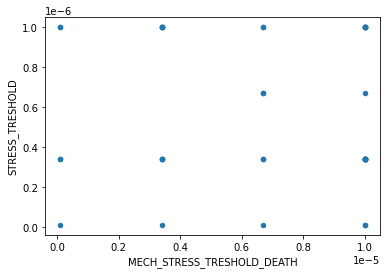

In [102]:
df = pd.DataFrame(param_values, columns=problem["names"])
df.plot.scatter(problem["names"][0], problem["names"][1], )

## Run simulations

In [ ]:
def run_biocellion(param_vector, model_folder):
    
def enter_parameter(parameter, parameter_loc, model_folder):
    

In [ ]:
for param in param_values:
    run_biocellion(param_vector)